In [1]:
import pandas as pd
import os
import numpy as np
import pickle
import json
import scipy
import matplotlib.pyplot as plt
import shutil
from skimage.measure import regionprops
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from datetime import datetime
import sys
import string
from PIL import Image
from scipy import signal
from scipy.interpolate import interp1d
from skimage import measure
import seaborn as sns
from scipy import stats

import df_utils
import features

In [2]:
df = pd.read_pickle('D://Datasets//full_filt_101x56_calcs_2')
print(len(df))
#df = df_utils.filter_df(df)
#len(df)

1469


In [3]:
df.columns

Index(['event', 'tf', 'mask', 'perimeter', 'area', 'circ', 'deform', 'r_um',
       'xcm_um', 'yc_um', 'perimeter_cx', 'area_cx', 'circ_cx', 'deform_cx',
       'r_um_cx', 'xc_um_el', 'yc_um_el', 'a', 'b', 'aspect', 'r_um_el',
       'cell', 'date', 'run', 'area_filt', 'v_avg', 'r_idx', 'nar1_idx',
       'nar2_idx', 'cav_idx', 'rad', 'nar1_def', 'nar2_def', 'cav1_def',
       'r_el', 'nar1_asp', 'nar2_asp', 'cav1_asp', 'y_val', 'y_filt', 'r_filt',
       'nar1_v_avg', 'cav_v_avg', 'x_pix', 'y_pix'],
      dtype='object')

In [4]:
df = features.calc_features(df)

C:\Users\codyt\Documents\repos\time-series-dc\features.py:94: RuntimeWarning: Mean of empty slice
  df['r_el'] = df.apply(lambda a: np.nanmean(a.r_um_el[a.r_idx]),axis=1)


TypeError: slice indices must be integers or None or have an __index__ method

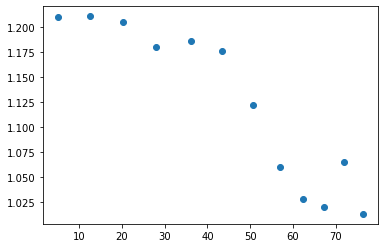

In [23]:
asp = df.iloc[0].aspect
xpos = df.iloc[0].xcm_um
asp1_max =  np.max(asp[(xpos>0)&(xpos<50)])
asp1_arg = np.where(asp==asp1_max)[0][0]

asp2_min =  np.min(asp[(xpos>50)&(xpos<100)])
asp2_arg = np.where(asp==asp2_min)[0][0]

plt.scatter(xpos[asp1_arg-1:asp2_arg+1],asp[asp1_arg-1:asp2_arg+1])

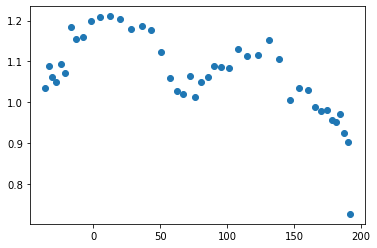

In [21]:
plt.scatter(xpos,asp)